# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='data/Reacher_Linux_20/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]



### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action

action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## My solution

API Documentation - Unity ML-Agents Python Interface and Trainers: https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Python-API.md

Environments: https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md

In [5]:
%load_ext autoreload
%autoreload 2




In [6]:
from ddpg_agent import Agent
from collections import deque

import torch
import matplotlib.pyplot as plt
%matplotlib inline

Training episode: 1


/home/lety/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Total score: 0.47
Training episode: 2
Episode 2	Total score: 0.55
Training episode: 3
Episode 3	Total score: 0.82
Training episode: 4
Episode 4	Total score: 0.43
Training episode: 5
Episode 5	Total score: 0.64
Training episode: 6
Episode 6	Total score: 0.86
Training episode: 7
Episode 7	Total score: 0.67
Training episode: 8
Episode 8	Total score: 1.47
Training episode: 9
Episode 9	Total score: 1.90
Training episode: 10
Episode 10	Total score: 1.74
Training episode: 11
Episode 11	Total score: 2.26
Training episode: 12
Episode 12	Total score: 3.10
Training episode: 13
Episode 13	Total score: 4.07
Training episode: 14
Episode 14	Total score: 5.86
Training episode: 15
Episode 15	Total score: 8.29
Training episode: 16
Episode 16	Total score: 12.52
Training episode: 17
Episode 17	Total score: 15.88
Training episode: 18
Episode 18	Total score: 22.58
Training episode: 19
Episode 19	Total score: 31.09
Training episode: 20
Episode 20	Total score: 33.11
Training episode: 21
Episode 21	T

Episode 129	Total score: 39.09

Average score in the latest 100 episodes: 38.163344146982766
Training episode: 130
Episode 130	Total score: 38.24

Average score in the latest 100 episodes: 38.15887414708268
Training episode: 131
Episode 131	Total score: 38.09

Average score in the latest 100 episodes: 38.14611914736777
Training episode: 132
Episode 132	Total score: 39.13

Average score in the latest 100 episodes: 38.15383414719533
Training episode: 133
Episode 133	Total score: 38.68

Average score in the latest 100 episodes: 38.15778414710704
Training episode: 134
Episode 134	Total score: 38.00

Average score in the latest 100 episodes: 38.157854147105475
Training episode: 135
Episode 135	Total score: 38.05

Average score in the latest 100 episodes: 38.17508414672036
Training episode: 136
Episode 136	Total score: 38.57

Average score in the latest 100 episodes: 38.1885441464195
Training episode: 137
Episode 137	Total score: 38.10

Average score in the latest 100 episodes: 38.1849591464

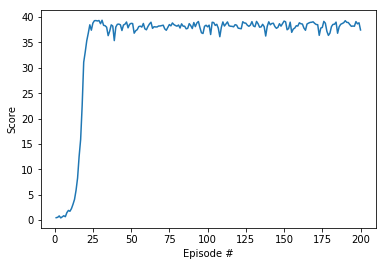

In [7]:
num_agents = 1
rl_agent = Agent(33, 4, 0)
                     
scores_deque = deque(maxlen=100)
scores = []
episodes = 200


for e in range(episodes):
    print("Training episode: {}".format(e+1))
    env_info = env.reset(train_mode=True)[brain_name]     
    
    ## First value batch
    states = env_info.vector_observations
    
    score = np.zeros((20,))
    while(True):
        
        actions = rl_agent.next_action(states)
        env_info = env.step(actions)
        
        next_states = env_info[brain_name].vector_observations
        rewards = env_info[brain_name].rewards                         
        dones = env_info[brain_name].local_done  
        
        score += np.array(rewards)
        
        rl_agent.step(states, actions, rewards, next_states, dones)
        states = next_states
        
        if any(dones):                                 
            break
        
        
        torch.save(rl_agent.actor.state_dict(), 'checkpoint_actor.pth')
        torch.save(rl_agent.critic.state_dict(), 'checkpoint_critic.pth')
    
    score_avg = np.mean(score)
    scores.append(score_avg)
    scores_deque.append(score_avg)
    print('\rEpisode {}\tTotal score: {:.2f}'.format(e+1, score_avg))
    
    if e >= 100:
        print('\nAverage score in the latest 100 episodes: {}'.format(np.mean(scores_deque)))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
rl_agent.actor.load_state_dict(torch.load('checkpoint_actor.pth'))
rl_agent.critic.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name] 
state = env_info.vector_observations
for t in range(200):
    action = rl_agent.next_action(state)
    env_info = env.step(action)
    state = env_info["ReacherBrain"].vector_observations
    dones = env_info["ReacherBrain"].local_done
    if np.any(dones):                                  
        break
        



In [ ]:
env.close()